#Importing libraries and dataset

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

In [14]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [15]:
df.shape

(500, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [17]:
df.describe().drop('Serial No.', axis = 1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [18]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


#EDA on the data

In [21]:
print(df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


<Axes: xlabel='Chance of Admit ', ylabel='Count'>

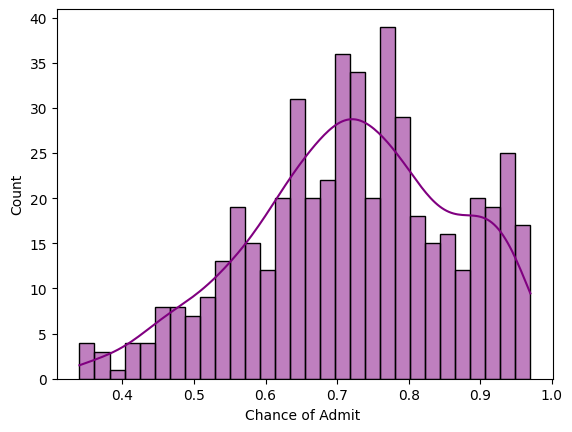

In [22]:
sns.histplot(data = df, x = 'Chance of Admit ', bins = 30, kde =True, color = 'purple')

In [74]:
df[['Chance of Admit ', 'GRE Score', 'TOEFL Score', 'CGPA']].describe().drop('count', axis = 0)

,Chance of Admit,GRE Score,TOEFL Score,CGPA
mean,0.72174,316.472000,107.192000,8.576440
std,0.14114,11.295148,6.081868,0.604813
min,0.34000,290.000000,92.000000,6.800000
25%,0.63000,308.000000,103.000000,8.127500
50%,0.72000,317.000000,107.000000,8.560000
75%,0.82000,325.000000,112.000000,9.040000
max,0.97000,340.000000,120.000000,9.920000


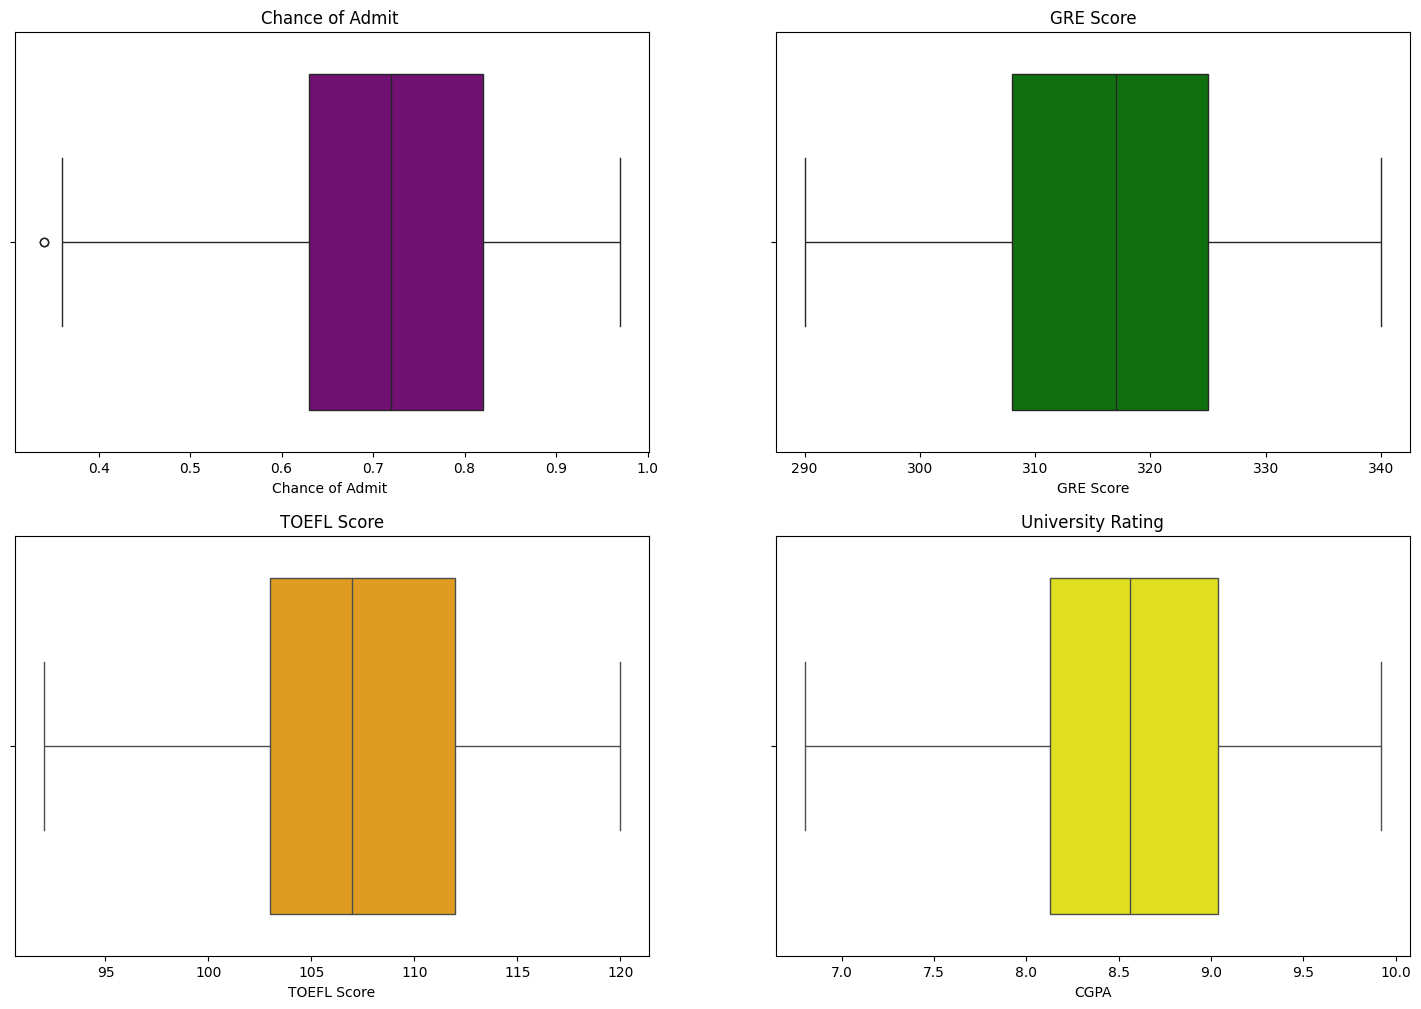

In [73]:
fig, ax = plt.subplots(2, 2, figsize = (18, 12))

plt.subplot(221)
sns.boxplot(data = df, x = 'Chance of Admit ', color = 'purple')
plt.title('Chance of Admit ')

plt.subplot(222)
sns.boxplot(data = df, x = 'GRE Score', color = 'green')
plt.title('GRE Score')

plt.subplot(223)
sns.boxplot(data = df, x = 'TOEFL Score', color = 'orange')
plt.title('TOEFL Score')

plt.subplot(224)
sns.boxplot(data = df, x = 'CGPA', color = 'yellow')
plt.title('University Rating')

plt.show()

In [31]:
df['University Rating'].nunique()

5

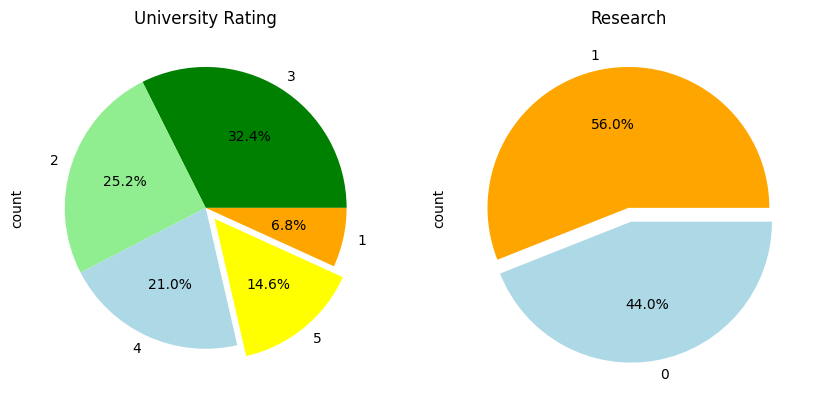

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))

plt.subplot(121)
df['University Rating'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['green', 'lightgreen', 'lightblue', 'yellow', 'orange'], explode = [0,0,0,0.1,0])
plt.title('University Rating')

plt.subplot(122)
df['Research'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['orange', 'lightblue'], explode = [0,0.1])
plt.title('Research')

plt.show()

In [46]:
df['LOR '].value_counts()

,count
LOR,
3.0,99
4.0,94
3.5,86
4.5,63
2.5,50
5.0,50
2.0,46
1.5,11
1.0,1


In [47]:
df['SOP'].value_counts()

,count
SOP,
4.0,89
3.5,88
3.0,80
2.5,64
4.5,63
2.0,43
5.0,42
1.5,25
1.0,6


In [52]:
df[['LOR ', 'SOP']].describe().drop('count', axis = 0)

,LOR,SOP
mean,3.48400,3.374000
std,0.92545,0.991004
min,1.00000,1.000000
25%,3.00000,2.500000
50%,3.50000,3.500000
75%,4.00000,4.000000
max,5.00000,5.000000


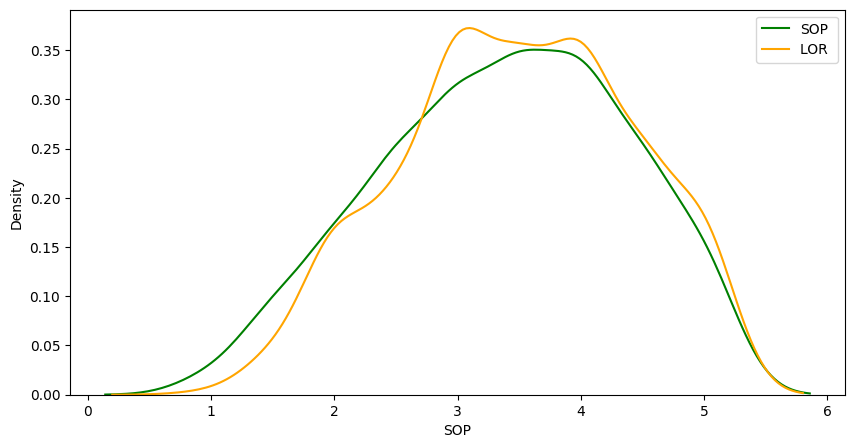

In [51]:
plt.figure(figsize = (10,5))
# sns.histplot(data = df, x = 'CGPA', bins = 30, kde = True, color = 'purple')
sns.kdeplot(df['SOP'], color = 'green')
sns.kdeplot(df['LOR '], color = 'orange')
plt.legend(['SOP', 'LOR '])
plt.show()


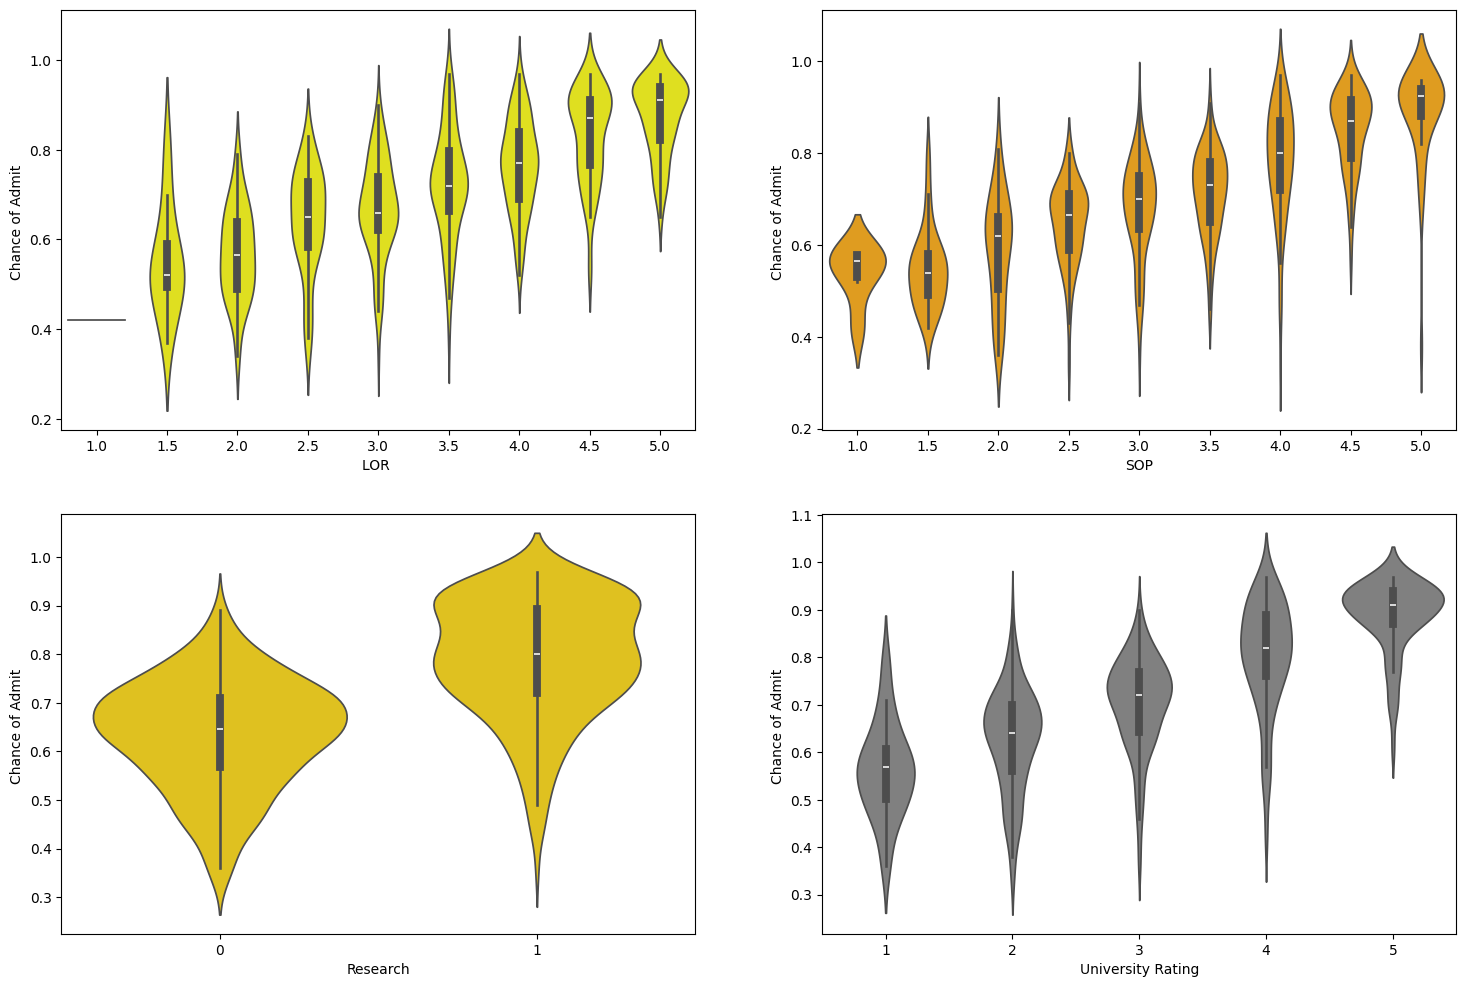

In [65]:
plt.subplots(2,2, figsize = (18,12))

plt.subplot(221)
sns.violinplot(data = df, x = 'LOR ', y = 'Chance of Admit ', color = 'yellow')

plt.subplot(222)
sns.violinplot(data = df, x = 'SOP', y = 'Chance of Admit ', color = 'orange')

plt.subplot(223)
sns.violinplot(data = df, x = 'Research', y = 'Chance of Admit ', color = 'gold')

plt.subplot(224)
sns.violinplot(data = df, x = 'University Rating', y = 'Chance of Admit ', color = 'grey')

plt.show()

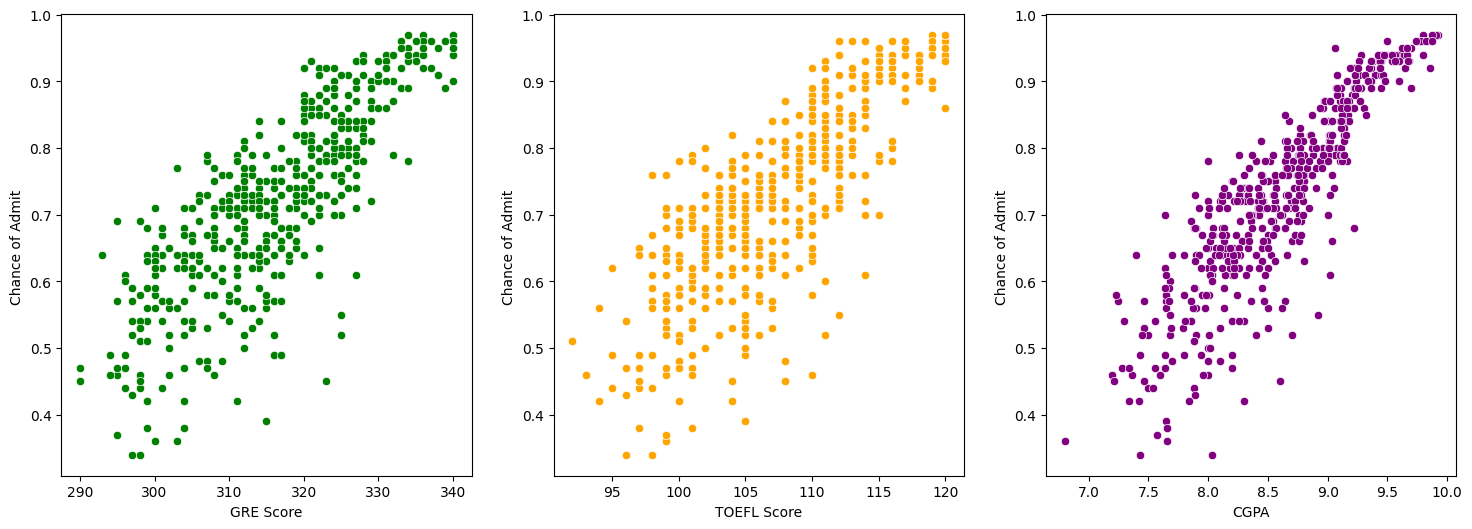

In [71]:
plt.subplots(1, 3, figsize = (18,6))

plt.subplot(131)
sns.scatterplot(data = df, x = 'GRE Score', y = 'Chance of Admit ', color = 'green')

plt.subplot(132)
sns.scatterplot(data = df, x = 'TOEFL Score', y = 'Chance of Admit ', color = 'orange')

plt.subplot(133)
sns.scatterplot(data = df, x = 'CGPA', y = 'Chance of Admit ', color = 'purple')

plt.show()

# Feature Engineering

In [75]:
df.drop('Serial No.', axis = 1, inplace = True)

In [76]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [77]:
x = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

In [78]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [79]:
x.shape

(500, 7)

In [80]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [84]:
x_train

array([[0.62      , 0.67857143, 0.5       , ..., 0.71428571, 0.65064103,
        1.        ],
       [0.52      , 0.67857143, 0.75      , ..., 1.        , 0.55769231,
        0.        ],
       [0.26      , 0.35714286, 0.5       , ..., 0.42857143, 0.54487179,
        0.        ],
       ...,
       [0.24      , 0.25      , 0.        , ..., 0.14285714, 0.14423077,
        0.        ],
       [0.38      , 0.46428571, 0.25      , ..., 0.71428571, 0.28205128,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.57142857, 0.46474359,
        0.        ]])

# ANN

In [86]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [87]:
ann = Sequential()

In [90]:
ann.add(Dense(units = 10, activation = 'relu', input_dim = 11))
ann.add(Dense(units = 10, activation = 'relu'))
ann.add(Dense(units = 1, activation = 'linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [92]:
ann.compile(optimizer= 'Adam', loss = 'mean_squared_error', metrics = ['accuracy', 'mse'])

In [93]:
timeline = ann.fit(x_train,  y_train, epochs = 100, validation_split= 0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.0000e+00 - loss: 0.4643 - mse: 0.4643 - val_accuracy: 0.0000e+00 - val_loss: 0.3826 - val_mse: 0.3826
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.3407 - mse: 0.3407 - val_accuracy: 0.0000e+00 - val_loss: 0.2427 - val_mse: 0.2427
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.2047 - mse: 0.2047 - val_accuracy: 0.0000e+00 - val_loss: 0.1140 - val_mse: 0.1140
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0869 - mse: 0.0869 - val_accuracy: 0.0000e+00 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0214 - mse: 0.0214 - val_accuracy: 0.0000e+00 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0159 - mse: 0.0159 - val_accuracy: 0.0000e+00 - val_loss: 0.0185 - val_mse: 0.01

In [94]:
y_pred = ann.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [95]:
y_pred

array([[0.9110222 ],
       [0.79940325],
       [0.5971084 ],
       [0.70454633],
       [0.81582284],
       [0.8663224 ],
       [0.4784702 ],
       [0.6325619 ],
       [0.81752   ],
       [0.8217732 ],
       [0.72837883],
       [0.7243779 ],
       [0.65135187],
       [0.9393883 ],
       [0.8188755 ],
       [0.5041518 ],
       [0.8469003 ],
       [0.60723126],
       [0.53485346],
       [0.59369504],
       [0.68488675],
       [0.5655384 ],
       [0.7086425 ],
       [0.7950682 ],
       [0.78632903],
       [0.6268445 ],
       [0.95224977],
       [0.8543536 ],
       [0.6358425 ],
       [0.74896336],
       [0.5491729 ],
       [0.7352285 ],
       [0.5603773 ],
       [0.86550164],
       [0.65115756],
       [0.73626137],
       [0.5497529 ],
       [0.9570173 ],
       [0.64005333],
       [0.7022755 ],
       [0.95466286],
       [0.58552194],
       [0.6546631 ],
       [0.8660315 ],
       [0.9417936 ],
       [0.56881726],
       [0.94862443],
       [0.849

In [96]:
from sklearn.metrics import r2_score

In [97]:
r2 = r2_score(y_test, y_pred)

In [99]:
print(f"The R2 Score is = {r2}")

The R2 Score is = 0.8091777264248313


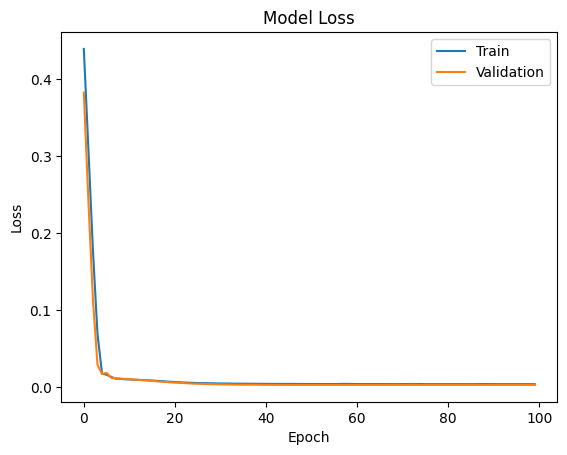

In [101]:
plt.plot(timeline.history['loss'])
plt.plot(timeline.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

In [109]:
res = ann.predict(scaler.transform([[310, 101, 4, 4, 4, 8.51, 0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [110]:
print(f"The chance of admission is {res[0][0]}")

The chance of admission is 0.6673406362533569
